# Diabetes Prediction

In [ ]:
#pip install pycaret\
# pip install mlxtend
# pip install tensorflow

# Librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from mlxtend.evaluate import confusion_matrix as CM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import numpy as np

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Análisis

In [ ]:
df.drop_duplicates(inplace = True)
df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,190055
2.0,35097
1.0,4629


In [ ]:
df = df.drop(['CholCheck','AnyHealthcare','NoDocbcCost','Fruits', 'Veggies', 'Education', 'HvyAlcoholConsump', 'Sex', 'Income', 'DiffWalk'], axis=1)

In [ ]:
df

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,5.0,18.0,15.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,11.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0


In [ ]:
valores_distintos = df['Age'].unique()
valores_distintos

array([13.,  7.,  9.,  5., 10.,  1.,  8.,  6., 11.,  3.,  2.,  4., 12.])

<Axes: title={'center': 'Pearson'}>

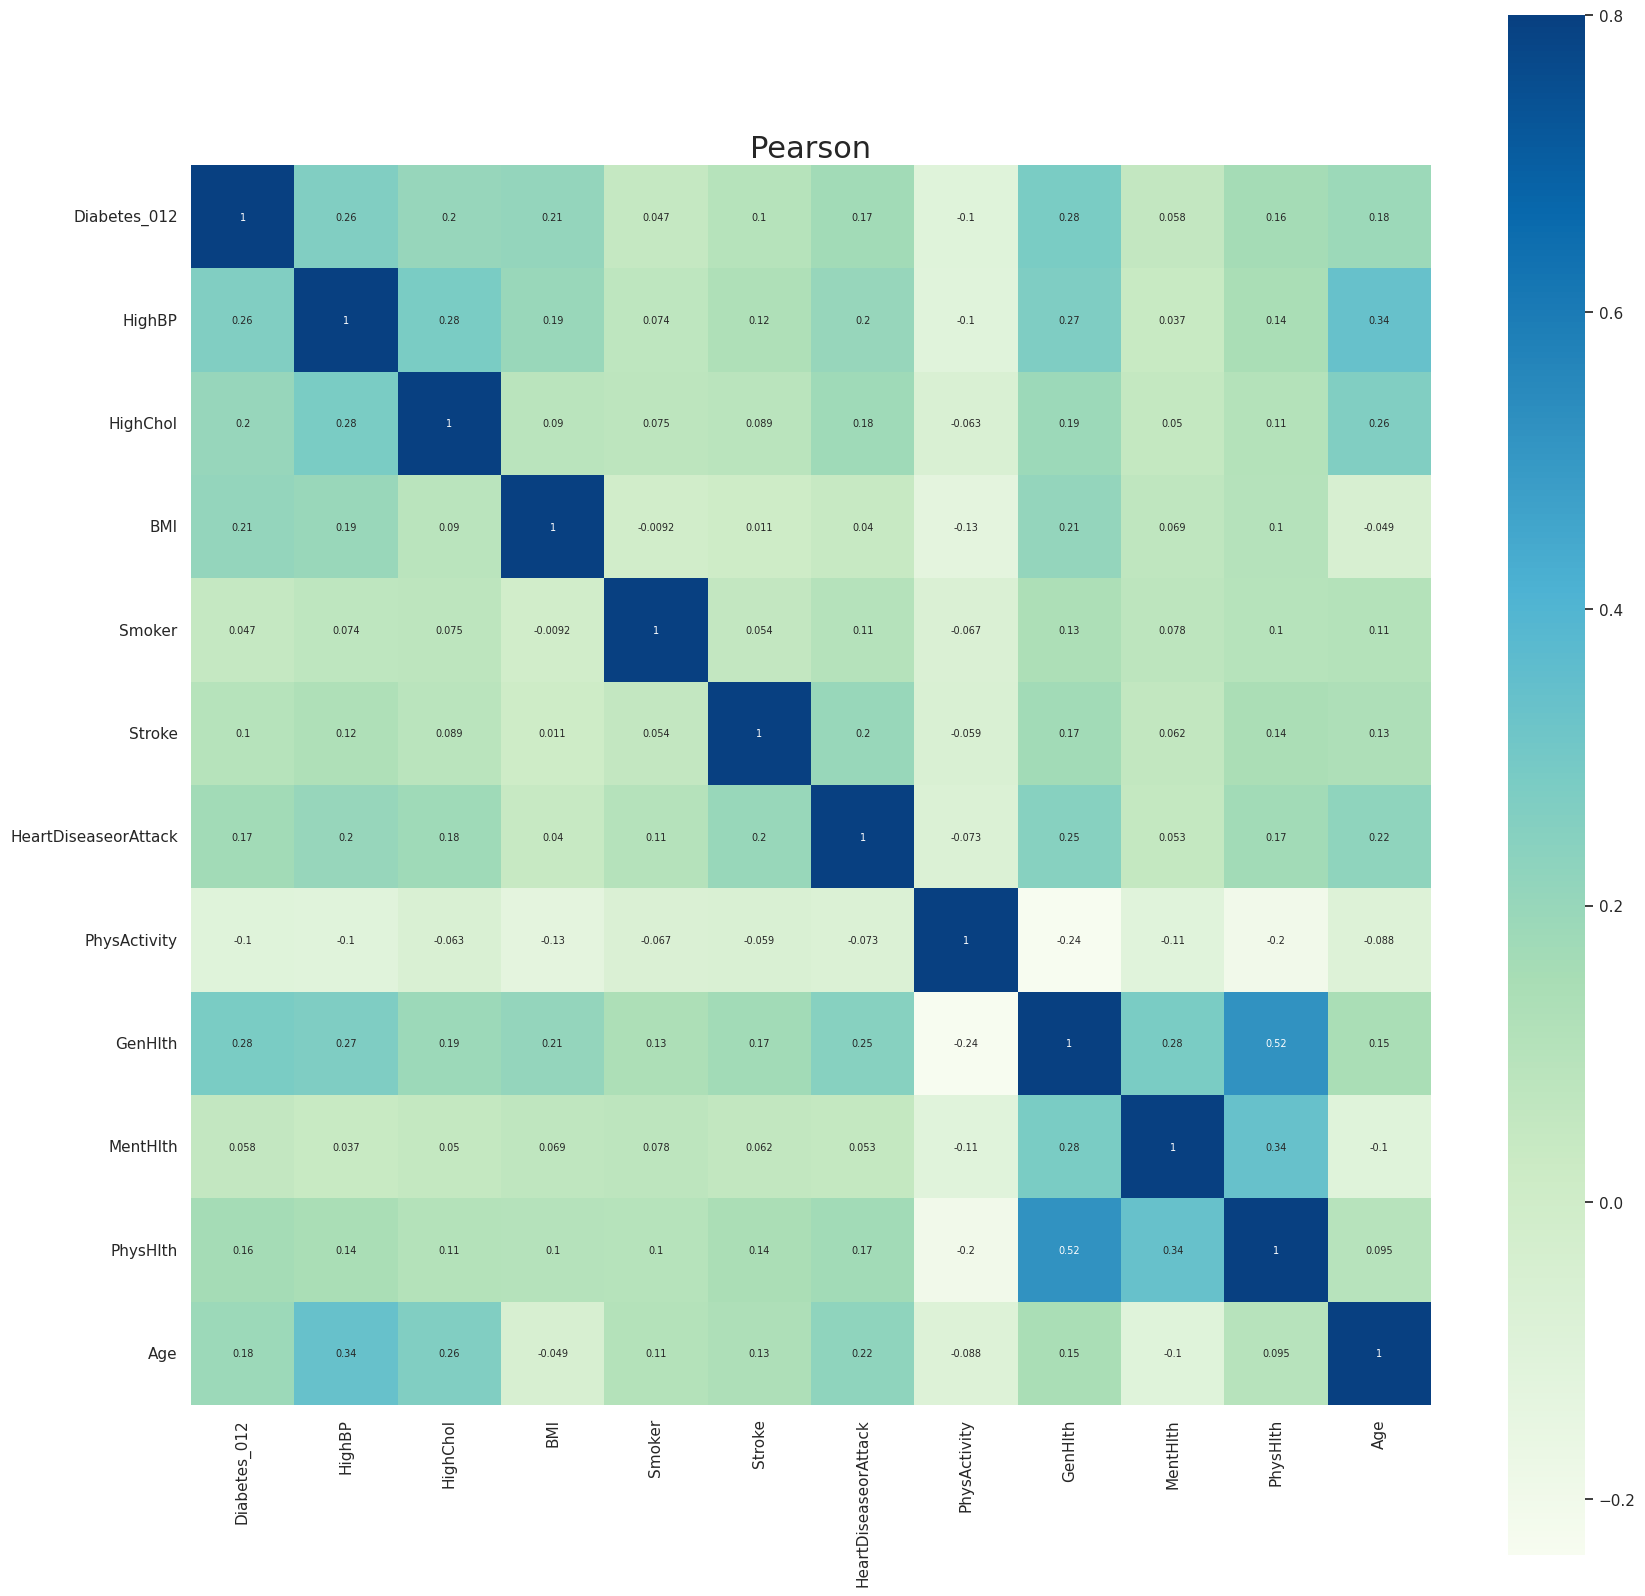

In [ ]:
#CORRELACION PEARSON
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(20,20))
plt.title("Pearson", fontsize=22)
sns.heatmap(df.corr(),vmax=0.8,square=True,cmap="GnBu",linecolor='r',annot=True,annot_kws={'size':7})

In [ ]:
#Redistribucion de data entre clases
df = df[df['Diabetes_012'] != 1.0]
df.loc[df['Diabetes_012'] == 2.0, 'Diabetes_012'] = 1.0

df_NO_Diabetes = df[df['Diabetes_012'] == 0.0]
df_SI_Diabetes = df[df['Diabetes_012'] == 1.0]

df_NO_Diabetes = df_NO_Diabetes.sample(frac=0.20, random_state=100)
df = pd.concat([df_NO_Diabetes, df_SI_Diabetes])

<ipython-input-9-231e5934ec75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Diabetes_012'] == 2.0, 'Diabetes_012'] = 1.0


In [ ]:
df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,38011
1.0,35097


array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>],
       [<Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

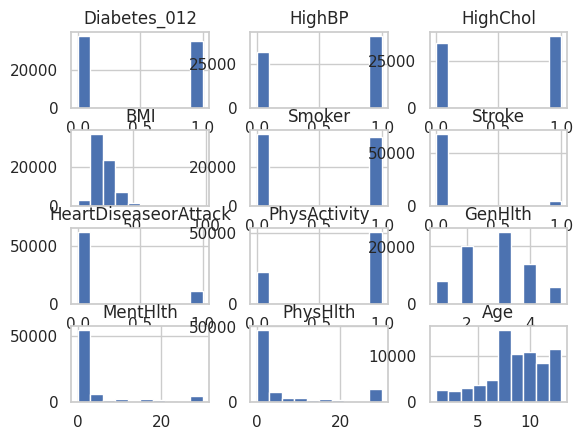

In [ ]:
df.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73108 entries, 159046 to 253679
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          73108 non-null  float64
 1   HighBP                73108 non-null  float64
 2   HighChol              73108 non-null  float64
 3   BMI                   73108 non-null  float64
 4   Smoker                73108 non-null  float64
 5   Stroke                73108 non-null  float64
 6   HeartDiseaseorAttack  73108 non-null  float64
 7   PhysActivity          73108 non-null  float64
 8   GenHlth               73108 non-null  float64
 9   MentHlth              73108 non-null  float64
 10  PhysHlth              73108 non-null  float64
 11  Age                   73108 non-null  float64
dtypes: float64(12)
memory usage: 7.3 MB


In [ ]:
#COPIAS DE DF
df_SVM = df
df_ANN = df

In [ ]:
scaler = MinMaxScaler()

# **SVM:**

In [ ]:
x_SVM = df_SVM.drop(df_SVM.columns[0], axis=1)

In [ ]:
x_SVM = scaler.fit(x_SVM).transform(x_SVM)
y_SVM = df_SVM[df.columns[0]]

In [ ]:
x_train_SVM, x_test_SVM, y_train_SVM, y_test_SVM = train_test_split(x_SVM, y_SVM, test_size=0.30, random_state=50)

In [ ]:
#ENTRENAMIENTO DEL MODELO
#svm_model = SVC()
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_SVM, y_train_SVM)

SVC(kernel='linear')

In [ ]:
# Predicciones SVM
y_pred_svm_train = svm_model.predict(x_train_SVM)
y_pred_svm_test = svm_model.predict(x_test_SVM)

In [ ]:
# Evaluacion SVM TRAIN
accuracy_svm = accuracy_score(y_train_SVM, y_pred_svm_train)
print("Métricas para el modelo SVM:")
print(classification_report(y_train_SVM, y_pred_svm_train))
print(accuracy_svm)

Métricas para el modelo SVM:
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     26526
         1.0       0.71      0.76      0.73     24649

    accuracy                           0.73     51175
   macro avg       0.73      0.73      0.73     51175
weighted avg       0.73      0.73      0.73     51175

0.7321934538348803


In [ ]:
# Evaluacion SVM TEST
accuracy_svm = accuracy_score(y_test_SVM, y_pred_svm_test)
print("Métricas para el modelo SVM:")
print(classification_report(y_test_SVM, y_pred_svm_test))
print(accuracy_svm)

Métricas para el modelo SVM:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73     11485
         1.0       0.69      0.76      0.72     10448

    accuracy                           0.72     21933
   macro avg       0.73      0.73      0.72     21933
weighted avg       0.73      0.72      0.72     21933

0.7242055350385265


In [ ]:
confusion_matrix(y_test_SVM, y_pred_svm_test)

array([[7980, 3505],
       [2544, 7904]])

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as archivo:
    pickle.dump(svm_model, archivo)

In [ ]:
with open('model.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

In [ ]:
fila_aleatoria = df.sample(n=1)
fila_aleatoria

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,Age
180384,0.0,0.0,0.0,25.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0,1.0


In [ ]:
X_test = fila_aleatoria.drop('Diabetes_012', axis=1)  # Si 'target' es tu columna objetivo, elimínala de las características
h1 = scaler.transform(X_test.values.reshape(-1, 11))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediccion = svm_model.predict(h1)
prediccion

array([0.])

# **ANN:**

In [ ]:
scalerANN = MinMaxScaler()

In [ ]:
x_ANN = df_ANN.drop(df_ANN.columns[0], axis=1)
x_ANN = scalerANN.fit(x_ANN).transform(x_ANN)
y_ANN = df_ANN[df.columns[0]]

In [ ]:
x_train_ANN, x_test_ANN, y_train_ANN, y_test_ANN = train_test_split(x_ANN, y_ANN, test_size=0.30, random_state=50)

In [ ]:
y_train_ANN = pd.get_dummies(y_train_ANN)
y_test_ANN = pd.get_dummies(y_test_ANN)

In [ ]:
#CONSTRUCCIÓN DE LA RED
ann = Sequential()
ann.add(Dense(11, activation='relu'))
ann.add(Dense(6, activation='relu'))
ann.add(Dense(4, activation='relu'))
ann.add(Dense(2, activation='sigmoid'))
ann.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
ann.fit(x=x_train_ANN, y=y_train_ANN ,validation_data=(x_test_ANN,y_test_ANN), batch_size=1000, epochs=60,verbose=1)

Epoch 1/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5111 - loss: 0.7002 - val_accuracy: 0.5655 - val_loss: 0.6759
Epoch 2/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6101 - loss: 0.6686 - val_accuracy: 0.6818 - val_loss: 0.6449
Epoch 3/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6916 - loss: 0.6324 - val_accuracy: 0.6920 - val_loss: 0.6003
Epoch 4/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6996 - loss: 0.5870 - val_accuracy: 0.6961 - val_loss: 0.5780
Epoch 5/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7115 - loss: 0.5640 - val_accuracy: 0.7042 - val_loss: 0.5672
Epoch 6/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7187 - loss: 0.5555 - val_accuracy: 0.7113 - val_loss: 0.5596
Epoch 7/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7202 - loss: 0.5508 - val_accuracy: 0.7168 - val_loss: 0.5543
Epoch 8/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7240 - loss: 0.5437 - val_accuracy: 0.7181 - val_loss:

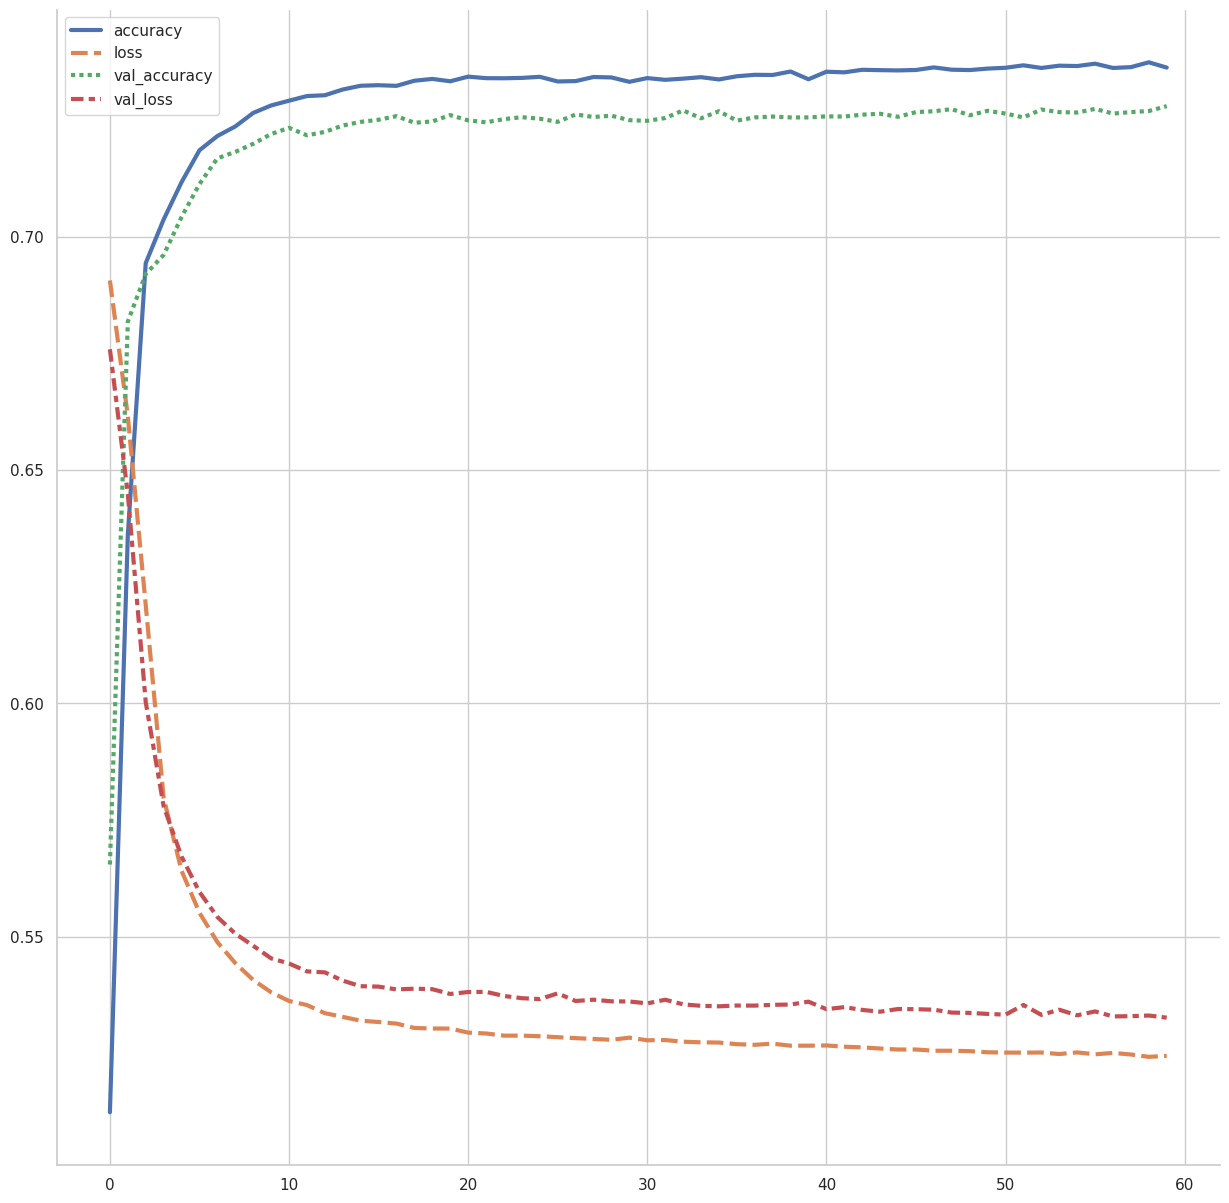

In [ ]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,15))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [ ]:
y_pred_train_ANN = ann.predict(x_train_ANN)
y_pred_test_ANN = ann.predict(x_test_ANN)

1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
for i in range(len(y_pred_train_ANN)):
  index = list(y_pred_train_ANN[i]).index(max(y_pred_train_ANN[i]))
  for j in range(len(y_pred_train_ANN[i])):
    y_pred_train_ANN[i][j] = 0
  y_pred_train_ANN[i][index] = 1

for i in range(len(y_pred_test_ANN)):
  index = list(y_pred_test_ANN[i]).index(max(y_pred_test_ANN[i]))
  for j in range(len(y_pred_test_ANN[i])):
    y_pred_test_ANN[i][j] = 0
  y_pred_test_ANN[i][index] = 1

In [ ]:
y_pred_train_ANN

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# Evaluacion ANN TRAIN
accuracy_ann = accuracy_score(y_train_ANN, y_pred_train_ANN)
print("Métricas para el modelo ANN TRAIN:")
print(classification_report(y_train_ANN, y_pred_train_ANN))
print(accuracy_ann)

Métricas para el modelo ANN TRAIN:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74     26526
           1       0.72      0.75      0.73     24649

   micro avg       0.74      0.74      0.74     51175
   macro avg       0.74      0.74      0.74     51175
weighted avg       0.74      0.74      0.74     51175
 samples avg       0.74      0.74      0.74     51175

0.7373717635564241


In [ ]:
# Evaluacion ANN TEST
accuracy_ann = accuracy_score(y_test_ANN, y_pred_test_ANN)
print("Métricas para el modelo ANN  TEST:")
print(classification_report(y_test_ANN, y_pred_test_ANN))
print(accuracy_ann)

Métricas para el modelo ANN  TEST:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73     11485
           1       0.70      0.75      0.72     10448

   micro avg       0.73      0.73      0.73     21933
   macro avg       0.73      0.73      0.73     21933
weighted avg       0.73      0.73      0.73     21933
 samples avg       0.73      0.73      0.73     21933

0.727944193680755


# Pruebas

In [ ]:
fila_aleatoria = df.sample(n=1)
fila_aleatoria

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,Age
11132,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,7.0


In [ ]:
fila_aleatoria

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,Age
180384,0.0,0.0,0.0,25.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0,1.0


In [ ]:
type(fila_aleatoria)

pandas.core.frame.DataFrame

In [ ]:
X_test.values

array([[ 0.,  0., 25.,  0.,  0.,  0.,  1.,  3.,  5.,  0.,  1.]])

In [ ]:
X_test = fila_aleatoria.drop('Diabetes_012', axis=1)  # Si 'target' es tu columna objetivo, elimínala de las características
h1 = scalerANN.transform(X_test.values.reshape(-1, 11))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
type(h1)

numpy.ndarray

In [ ]:
h1

array([[1.        , 1.        , 0.18604651, 0.        , 0.        ,
        0.        , 1.        , 0.75      , 0.06666667, 0.06666667,
        0.5       ]])

In [ ]:
pred_ann = ann.predict(h1)
pred_ann

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.86955154, 0.28968084]], dtype=float32)

# Importación

In [ ]:
import pickle

In [ ]:
with open('modelANN.pkl', 'wb') as archivo:
    pickle.dump(ann, archivo)

In [ ]:
with open('scalerANN.pkl', 'wb') as archivo:
    pickle.dump(scalerANN, archivo)

La primera descarga da resultados sobre el 70, entre un rango de la clase 0 de 0.22 a 0.26. Con 22 da los mejores resultados. Incluso se ve que con 55 o 60 epocas podria ser suficiente.

La segunda descarga tiene un buen resultado con 0.25.

La tercera descarga tiene los mejores resultados con 0.20